In [74]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

In [75]:
# tratamento de dados do flavio


# Define os nomes das colunas e as larguras de cada campo
colspecs = [(2, 10), (10, 22), (56, 69), (82, 95)]
names = ['Data', 'Codigo', 'Preco_Abertura', 'Preco_Fechamento']

# Carrega o arquivo
df = pd.read_fwf('COTAHIST_A2022.TXT', colspecs=colspecs, names=names, header=None)

# df.head()
# Filtra pela ação VALE3, garantindo que seja exatamente VALE3 (sem caracteres adicionais)
aflt3_df_2022 = df[df['Codigo'].str.endswith('AFLT3')]


# Supondo que 'df' seja o seu DataFrame e 'Data' a coluna com as datas

# Convertendo a coluna 'Data' para datetime
aflt3_df_2022['Data'] = pd.to_datetime(aflt3_df_2022['Data'], format='%Y%m%d')

# Extraindo ano, mês e dia
aflt3_df_2022['Ano'] = aflt3_df_2022['Data'].dt.year
aflt3_df_2022['Mes'] = aflt3_df_2022['Data'].dt.month
aflt3_df_2022['Dia'] = aflt3_df_2022['Data'].dt.day


print(aflt3_df_2022)

              Data   Codigo  Preco_Abertura  Preco_Fechamento   Ano  Mes  Dia
24      2022-01-03  02AFLT3           850.0             850.0  2022    1    3
2409    2022-01-19  02AFLT3           860.0             860.0  2022    1   19
2440    2022-02-21  02AFLT3           900.0             869.0  2022    2   21
8602    2022-02-22  02AFLT3           919.0             907.0  2022    2   22
9046    2022-01-20  02AFLT3           860.0             860.0  2022    1   20
...            ...      ...             ...               ...   ...  ...  ...
1209673 2022-11-22  02AFLT3           951.0             913.0  2022   11   22
1215391 2022-10-19  02AFLT3           925.0             925.0  2022   10   19
1230912 2022-11-09  02AFLT3           959.0             915.0  2022   11    9
1232553 2022-11-30  02AFLT3           913.0             913.0  2022   11   30
1234413 2022-11-25  02AFLT3           949.0             949.0  2022   11   25

[202 rows x 7 columns]


C:\Users\Rubeus\AppData\Local\Temp\ipykernel_37404\1695391301.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aflt3_df_2022['Data'] = pd.to_datetime(aflt3_df_2022['Data'], format='%Y%m%d')
C:\Users\Rubeus\AppData\Local\Temp\ipykernel_37404\1695391301.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aflt3_df_2022['Ano'] = aflt3_df_2022['Data'].dt.year
C:\Users\Rubeus\AppData\Local\Temp\ipykernel_37404\1695391301.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [76]:
# tratamento de dados do flavio


# Define os nomes das colunas e as larguras de cada campo
colspecs = [(2, 10), (10, 22), (56, 69), (82, 95)]
names = ['Data', 'Codigo', 'Preco_Abertura', 'Preco_Fechamento']

# Carrega o arquivo
df = pd.read_fwf('COTAHIST_A2023.TXT', colspecs=colspecs, names=names, header=None)

# df.head()
# Filtra pela ação VALE3, garantindo que seja exatamente VALE3 (sem caracteres adicionais)
aflt3_df_2023 = df[df['Codigo'].str.endswith('AFLT3')]


# Supondo que 'df' seja o seu DataFrame e 'Data' a coluna com as datas

# Convertendo a coluna 'Data' para datetime
aflt3_df_2023['Data'] = pd.to_datetime(aflt3_df_2023['Data'], format='%Y%m%d')

# Extraindo ano, mês e dia
aflt3_df_2023['Ano'] = aflt3_df_2023['Data'].dt.year
aflt3_df_2023['Mes'] = aflt3_df_2023['Data'].dt.month
aflt3_df_2023['Dia'] = aflt3_df_2023['Data'].dt.day


print(aflt3_df_2023)

              Data   Codigo  Preco_Abertura  Preco_Fechamento   Ano  Mes  Dia
84      2023-01-02  02AFLT3           940.0             928.0  2023    1    2
1675    2023-01-03  02AFLT3           927.0             927.0  2023    1    3
3288    2023-01-04  02AFLT3           931.0             913.0  2023    1    4
5090    2023-01-05  02AFLT3           913.0             913.0  2023    1    5
6718    2023-01-06  02AFLT3           919.0             913.0  2023    1    6
...            ...      ...             ...               ...   ...  ...  ...
1334619 2023-12-13  02AFLT3           871.0             871.0  2023   12   13
1338078 2023-12-15  02AFLT3           844.0             842.0  2023   12   15
1341435 2023-12-19  02AFLT3           869.0             830.0  2023   12   19
1348129 2023-12-26  02AFLT3           860.0             855.0  2023   12   26
1349901 2023-12-27  02AFLT3           859.0             859.0  2023   12   27

[168 rows x 7 columns]


C:\Users\Rubeus\AppData\Local\Temp\ipykernel_37404\4102973105.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aflt3_df_2023['Data'] = pd.to_datetime(aflt3_df_2023['Data'], format='%Y%m%d')
C:\Users\Rubeus\AppData\Local\Temp\ipykernel_37404\4102973105.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aflt3_df_2023['Ano'] = aflt3_df_2023['Data'].dt.year
C:\Users\Rubeus\AppData\Local\Temp\ipykernel_37404\4102973105.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [77]:
# tratamento de dados do flavio


# Define os nomes das colunas e as larguras de cada campo
colspecs = [(2, 10), (10, 22), (56, 69), (82, 95)]
names = ['Data', 'Codigo', 'Preco_Abertura', 'Preco_Fechamento']

# Carrega o arquivo
df = pd.read_fwf('COTAHIST_A2024.TXT', colspecs=colspecs, names=names, header=None)

# df.head()
# Filtra pela ação VALE3, garantindo que seja exatamente VALE3 (sem caracteres adicionais)
aflt3_df_2024 = df[df['Codigo'].str.endswith('AFLT3')]


# Supondo que 'df' seja o seu DataFrame e 'Data' a coluna com as datas

# Convertendo a coluna 'Data' para datetime
aflt3_df_2024['Data'] = pd.to_datetime(aflt3_df_2024['Data'], format='%Y%m%d')

# Extraindo ano, mês e dia
aflt3_df_2024['Ano'] = aflt3_df_2024['Data'].dt.year
aflt3_df_2024['Mes'] = aflt3_df_2024['Data'].dt.month
aflt3_df_2024['Dia'] = aflt3_df_2024['Data'].dt.day


print(aflt3_df_2024)

             Data   Codigo  Preco_Abertura  Preco_Fechamento   Ano  Mes  Dia
66     2024-01-02  02AFLT3           811.0             780.0  2024    1    2
1801   2024-01-03  02AFLT3           847.0             847.0  2024    1    3
3757   2024-01-04  02AFLT3           845.0             845.0  2024    1    4
7194   2024-01-08  02AFLT3           845.0             845.0  2024    1    8
10423  2024-01-10  02AFLT3           792.0             792.0  2024    1   10
12189  2024-01-11  02AFLT3           800.0             787.0  2024    1   11
13761  2024-01-12  02AFLT3           787.0             787.0  2024    1   12
18875  2024-01-17  02AFLT3           800.0             800.0  2024    1   17
22165  2024-01-19  02AFLT3           808.0             808.0  2024    1   19
23793  2024-01-22  02AFLT3           799.0             760.0  2024    1   22
25423  2024-01-23  02AFLT3           817.0             809.0  2024    1   23
27439  2024-01-24  02AFLT3           809.0             809.0  2024    1   24

C:\Users\Rubeus\AppData\Local\Temp\ipykernel_37404\3529510312.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aflt3_df_2024['Data'] = pd.to_datetime(aflt3_df_2024['Data'], format='%Y%m%d')
C:\Users\Rubeus\AppData\Local\Temp\ipykernel_37404\3529510312.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aflt3_df_2024['Ano'] = aflt3_df_2024['Data'].dt.year
C:\Users\Rubeus\AppData\Local\Temp\ipykernel_37404\3529510312.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [78]:
df_unificado = pd.concat([aflt3_df_2022, aflt3_df_2023], axis=0)
df_unificado = df_unificado.set_index('Data')
print(df_unificado)

             Codigo  Preco_Abertura  Preco_Fechamento   Ano  Mes  Dia
Data                                                                 
2022-01-03  02AFLT3           850.0             850.0  2022    1    3
2022-01-19  02AFLT3           860.0             860.0  2022    1   19
2022-02-21  02AFLT3           900.0             869.0  2022    2   21
2022-02-22  02AFLT3           919.0             907.0  2022    2   22
2022-01-20  02AFLT3           860.0             860.0  2022    1   20
...             ...             ...               ...   ...  ...  ...
2023-12-13  02AFLT3           871.0             871.0  2023   12   13
2023-12-15  02AFLT3           844.0             842.0  2023   12   15
2023-12-19  02AFLT3           869.0             830.0  2023   12   19
2023-12-26  02AFLT3           860.0             855.0  2023   12   26
2023-12-27  02AFLT3           859.0             859.0  2023   12   27

[370 rows x 6 columns]


In [79]:
total_na = df_unificado.isnull().sum().sum()
total_unknown = df_unificado.eq('Unknown').sum().sum()
print(total_na, total_unknown)

0 0


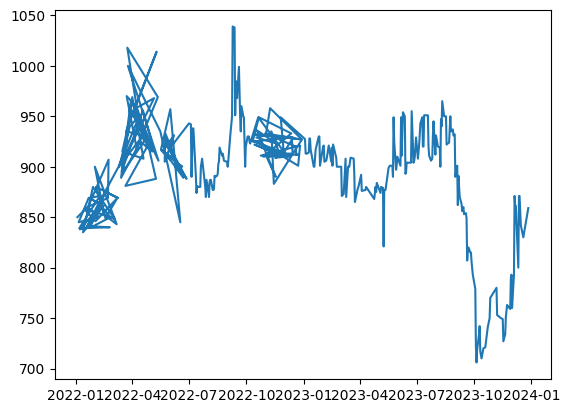

In [80]:

plt.plot(df_unificado['Preco_Fechamento'])
plt.show()

# print(df_unificado)

In [57]:
p = 1
d = 1
q = 1

start_date = pd.to_datetime('2022-01-03')
end_date = pd.to_datetime('2023-12-27')
forecast_start_date = pd.to_datetime('2024-01-02')

forecast_end_date = pd.to_datetime('2024-03-28')

training_data = df_unificado[start_date:end_date]['Preco_Fechamento']

model = ARIMA(training_data, order=(p, d, q))
                                    
model_fit = model.fit()

forecast = model_fit.predict(start=forecast_start_date, end=forecast_end_date)

combined_data = pd.concat([df_unificado['Preco_Fechamento'], forecast], axis=0)
combined_data.plot(figsize=(10, 6))

plt.show()

c:\Users\Rubeus\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rubeus\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rubeus\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rubeus\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is no

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [107]:
# sem suavisação
# arima_df = pd.DataFrame(df_unificado['Preco_Abertura'], index=pd.date_range(start='2023-01-02', end='2022-11-25' ))

p = 1
d = 1
q = 1
modelo_arima_sem_suavisacao = ARIMA(df_unificado['Preco_Fechamento'], order=(p, d, q)).fit()
previsoes_sem_suavisacao = modelo_arima_sem_suavisacao.predict(start=1, end=len(aflt3_df_2024['Preco_Fechamento']))
print(previsoes_sem_suavisacao)

Data
2022-01-19    570.143250
2022-02-21    976.247145
2022-02-22    879.755471
2022-01-20    878.603720
2022-02-07    869.728431
2022-01-05    843.305183
2022-01-21    856.385695
2022-02-08    864.450409
2022-01-06    858.681980
2022-02-24    846.075470
2022-01-24    836.108140
2022-02-09    850.578750
2022-01-07    846.204456
2022-01-25    846.222764
2022-02-25    841.162851
2022-02-10    853.577981
2022-01-26    863.323249
2022-02-11    864.632143
2022-01-27    859.493245
2022-02-14    857.440131
2022-01-12    846.148723
2022-01-28    862.576924
2022-03-04    852.322478
2022-02-15    862.920836
2022-01-31    869.596241
2022-03-07    864.496778
2022-02-16    864.911072
2022-01-14    845.238893
2022-02-01    852.744942
2022-03-08    859.957557
2022-02-17    853.298599
2022-02-02    870.747008
2022-03-09    865.725561
2022-02-18    878.252115
2022-01-18    855.634382
2022-02-03    857.427183
2022-03-10    870.151345
2022-04-12    918.233953
2022-03-28    940.121880
2022-03-11    929.41

c:\Users\Rubeus\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rubeus\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rubeus\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rubeus\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is no

In [103]:
# aflt3_df_2024 = aflt3_df_2024.set_index('Data')

# df_comparativo_sem_suavisacao = pd.concat([aflt3_df_2024['Preco_Abertura'], previsoes_sem_suavisacao], axis=1 )

# df_comparativo_sem_suavisacao.rename(columns={'predicted_mean': 'previsoes do arima', 'Preco_Abertura': 'Dados reais'}, inplace=True)
erro_medio_sem_suavisacao = mean_squared_error(aflt3_df_2024['Preco_Fechamento'], previsoes_sem_suavisacao)
erro_medio_sem_suavisacao = np.sqrt(erro_medio_sem_suavisacao)
print(erro_medio_sem_suavisacao)

117.13330267354807


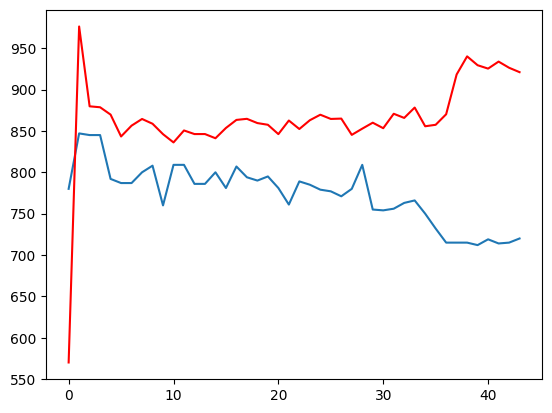

In [117]:
previsoes_sem_suavisacao = previsoes_sem_suavisacao.reset_index(drop=True)
aflt3_df_2024 = aflt3_df_2024.reset_index(drop=True)
df_comparativo = pd.concat([aflt3_df_2024['Preco_Fechamento'], previsoes_sem_suavisacao], axis=1)

plt.plot(aflt3_df_2024['Preco_Fechamento'])
plt.plot(previsoes_sem_suavisacao, color='red')
plt.show()

In [124]:
# Suavização com média móvel

window_size = 3
smoothed_data = np.convolve(df_unificado['Preco_Fechamento'], np.ones(window_size), 'same') / window_size

print(smoothed_data)

[ 476.55555556  769.44444444  872.33333333  876.55555556  867.55555556
  859.55555556  856.          858.66666667  857.11111111  849.88888889
  845.77777778  844.66666667  846.77777778  845.22222222  846.44444444
  850.88888889  857.77777778  861.22222222  860.77777778  856.22222222
  855.55555556  854.22222222  857.77777778  860.55555556  864.22222222
  865.77777778  860.44444444  856.          853.55555556  854.77777778
  859.44444444  862.22222222  868.88888889  867.33333333  864.77777778
  862.11111111  876.11111111  900.          921.11111111  928.88888889
  929.44444444  928.77777778  927.55555556  920.22222222  922.66666667
  923.44444444  933.22222222  929.33333333  935.55555556  932.66666667
  933.55555556  929.11111111  927.          928.11111111  926.44444444
  935.11111111  939.77777778  943.22222222  929.66666667  915.44444444
  902.22222222  905.88888889  927.11111111  951.55555556  964.66666667
  957.          951.55555556  948.11111111  951.66666667  956.66666667
  966.

In [85]:
df_suavisado = df_unificado
df_suavisado['Preco_Fechamento'] = smoothed_data
p = 5
d = 1
q = 0

modelo_arima = ARIMA(df_suavisado['Preco_Fechamento'], order=(p, d, q)).fit()

# df_suavisado.set_index('Data', inplace=True)

previsoes_suavisadas = modelo_arima.predict(start=1, end=len(aflt3_df_2024))

print(previsoes_suavisadas)

Data
2022-01-19    570.140444
2022-02-21    968.886042
2022-02-22    868.352765
2022-01-20    804.706443
2022-02-07    838.359321
2022-01-05    856.181022
2022-01-21    856.960672
2022-02-08    869.730518
2022-01-06    860.680443
2022-02-24    843.416582
2022-01-24    835.611497
2022-02-09    852.181790
2022-01-07    850.069328
2022-01-25    845.177265
2022-02-25    840.128163
2022-02-10    853.440114
2022-01-26    864.330428
2022-02-11    863.882179
2022-01-27    856.762674
2022-02-14    855.840959
2022-01-12    847.024726
2022-01-28    862.465421
2022-03-04    855.332492
2022-02-15    861.124139
2022-01-31    869.288827
2022-03-07    864.703081
2022-02-16    862.396095
2022-01-14    845.795908
2022-02-01    852.168558
2022-03-08    862.877000
2022-02-17    855.235714
2022-02-02    867.878683
2022-03-09    866.724065
2022-02-18    875.915392
2022-01-18    855.530212
2022-02-03    855.112967
2022-03-10    871.540085
2022-04-12    919.793418
2022-03-28    939.610323
2022-03-11    922.21

c:\Users\Rubeus\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rubeus\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rubeus\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rubeus\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is no

In [86]:

erro_medio_com_suavizacao = mean_squared_error(aflt3_df_2024['Preco_Fechamento'], previsoes_suavisadas)
erro_medio_com_suavizacao = np.sqrt(erro_medio_com_suavizacao)
print(erro_medio_com_suavizacao)

116.08327027275126


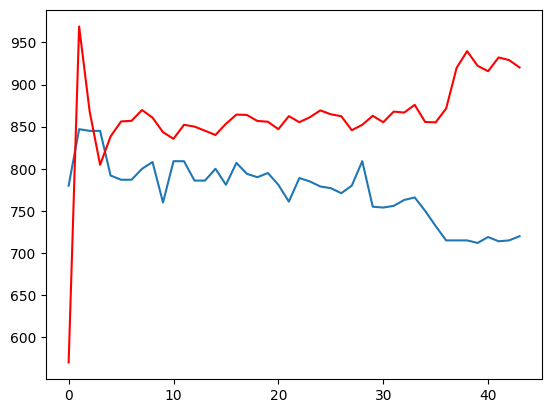

In [125]:
previsoes_suavisadas = previsoes_suavisadas.reset_index(drop=True)
aflt3_df_2024 = aflt3_df_2024.reset_index(drop=True)
df_comparativo = pd.concat([aflt3_df_2024['Preco_Fechamento'], previsoes_suavisadas], axis=1)

plt.plot(aflt3_df_2024['Preco_Fechamento'])
plt.plot(previsoes_suavisadas, color='red')
plt.show()